In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('/content/insurance.csv')


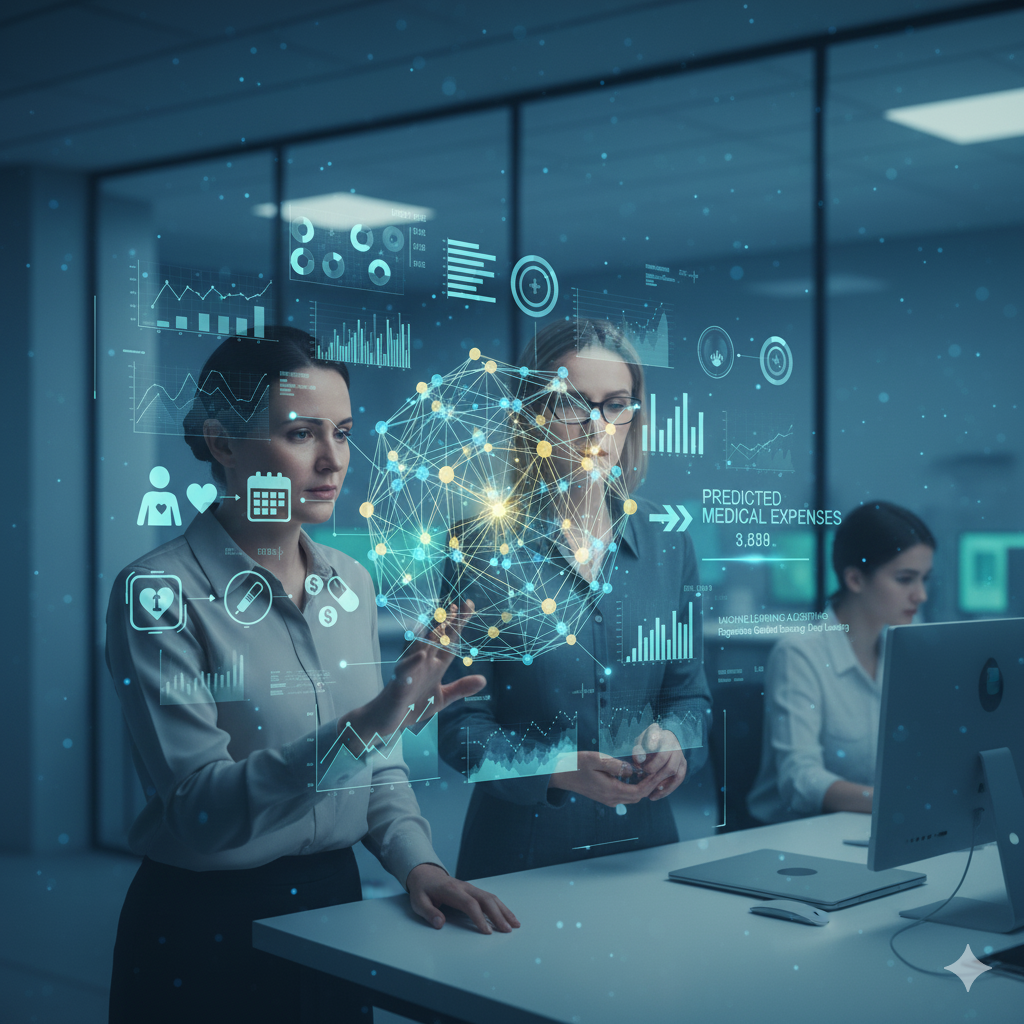

In [ ]:
# Displaying the first 5 rows of the dataframe
df.sample(5)


,age,sex,bmi,children,smoker,region,charges
51,21,female,33.630,2,no,northwest,3579.82870
410,19,male,17.480,0,no,northwest,1621.34020
375,23,female,28.310,0,yes,northwest,18033.96790
688,47,female,24.100,1,no,southwest,26236.57997
769,38,female,19.475,2,no,northwest,6933.24225


In [ ]:
# Checking the number of rows and columns in the dataframe
df.shape


(1338, 7)

In [ ]:
# Getting information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Checking for missing values
df.isnull().sum()



,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# Getting statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Getting statistical measures of numerical features
from collections import OrderedDict

numeric_cols = df.select_dtypes(include=['number']).columns

stats = []
for i in numeric_cols:
    numerical_stats = OrderedDict({
        "Feature": i,
        "max": df[i].max(),
        "min": df[i].min(),
        "mean": df[i].mean(),
        "median": df[i].median(),
        "standard deviation": df[i].std(),
        "variance": df[i].var(),
        "skewness": df[i].skew(),
        "kurtosis": df[i].kurt(),
        "25%": df[i].quantile(0.25),
        "75%": df[i].quantile(0.75),
        "IQR": df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    stats.append(numerical_stats)

# Create DataFrame report
report = pd.DataFrame(stats)
print(report.T)


                             0          1         2                 3
Feature                    age        bmi  children           charges
max                       64.0      53.13       5.0       63770.42801
min                       18.0      15.96       0.0         1121.8739
mean                 39.207025  30.663397  1.094918      13270.422265
median                    39.0       30.4       1.0          9382.033
standard deviation    14.04996   6.098187  1.205493      12110.011237
variance            197.401387  37.187884  1.453213  146652372.152855
skewness              0.055673   0.284047   0.93838           1.51588
kurtosis             -1.245088  -0.050732  0.202454          1.606299
25%                       27.0   26.29625       0.0        4740.28715
75%                       51.0   34.69375       2.0      16639.912515
IQR                       24.0     8.3975       2.0      11899.625365


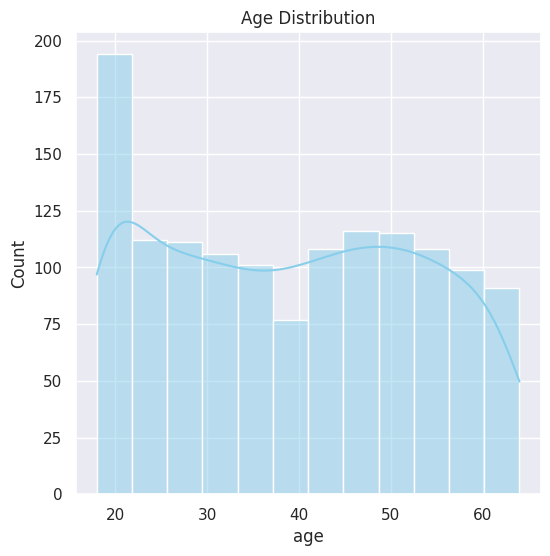

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='age', color='skyblue', kde=True) # Changed to histplot for better visualization
plt.title('Age Distribution')
plt.show()

/tmp/ipython-input-4214341058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis') # Using viridis palette


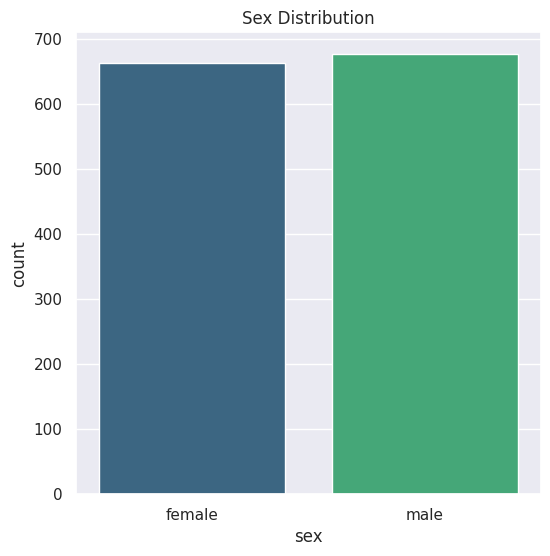

In [ ]:
# Gender column distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df, palette='viridis') # Using viridis palette
plt.title('Sex Distribution')
plt.show()


In [ ]:
# Value counts for sex column
df['sex'].value_counts()


,count
sex,
male,676
female,662


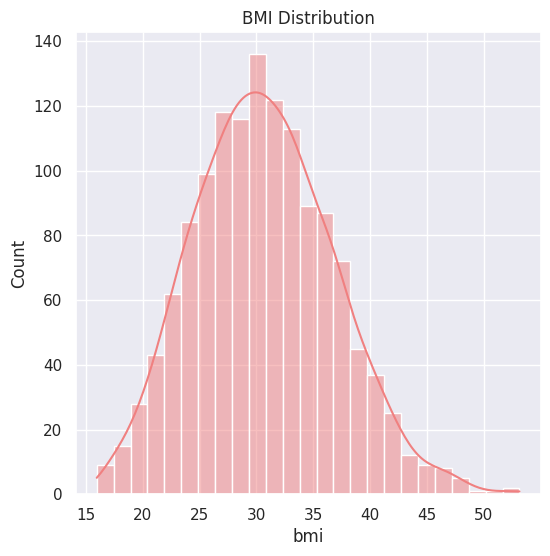

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='bmi', color='lightcoral', kde=True)
plt.title('BMI Distribution')
plt.show()

/tmp/ipython-input-561598990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df, palette='plasma') # Using plasma palette


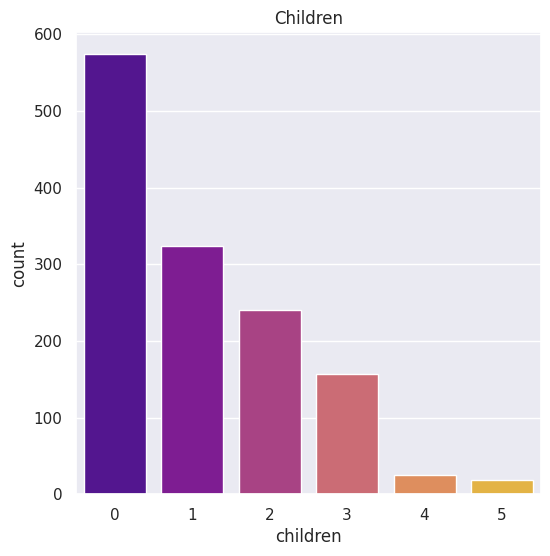

In [ ]:
# children column distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df, palette='plasma') # Using plasma palette
plt.title('Children')
plt.show()

In [ ]:
# Value counts for children column
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


/tmp/ipython-input-3753707865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='magma') # Using magma palette


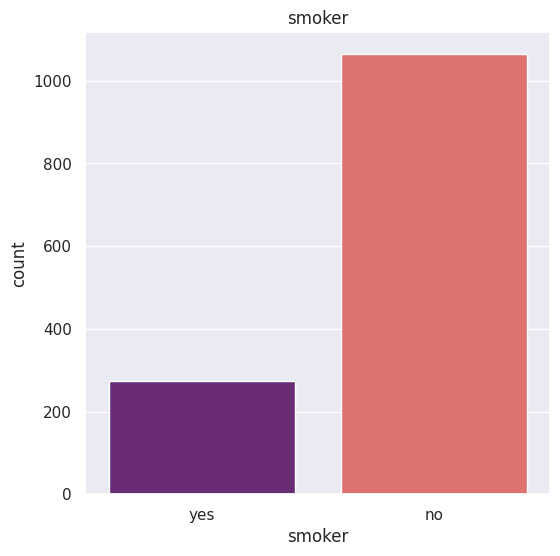

In [ ]:
# smoker column distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df, palette='magma') # Using magma palette
plt.title('smoker')
plt.show()

In [ ]:
# Value counts for smoker column
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


/tmp/ipython-input-4122213541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='cividis') # Using cividis palette


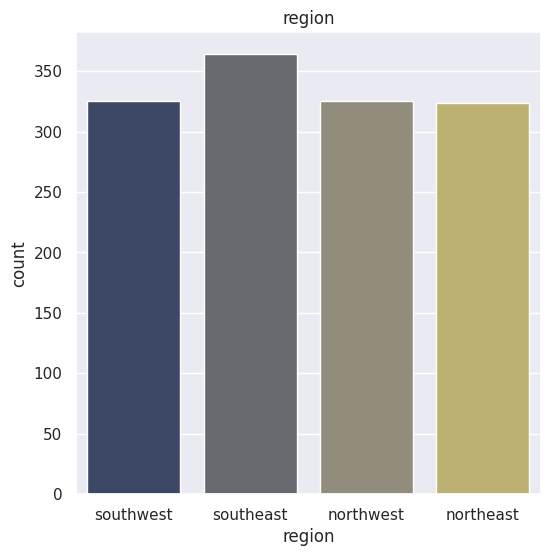

In [ ]:
# region column distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df, palette='cividis') # Using cividis palette
plt.title('region')
plt.show()

In [ ]:
# Value counts for region column
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


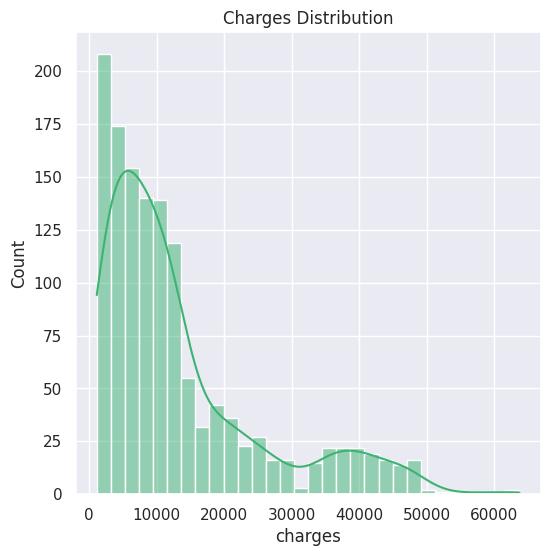

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='charges', color='mediumseagreen', kde=True) # Changed to histplot and changed color
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [ ]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/tmp/ipython-input-1613012130.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace=True)
/tmp/ipython-input-1613012130.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
/tmp/ipython-input-1613012130.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

Splitting the Features and Target

In [ ]:
# Separating features (X) and target (Y)
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [ ]:
# Printing the features
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:

# Printing the target
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
# Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# Printing the shapes of the original, training, and testing data
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
# Loading the Linear Regression model
regressor = LinearRegression()


In [ ]:
# Training the model
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predicting on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value for training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [ ]:
# Predicting on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value for test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [ ]:
# Making a prediction with new data

input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array to predict for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
